<font size="6">**PREDICTING WINE QUALITY**<font>

## I’ve written up a Jupyter notebook below that explores the performance of several commonly used decision tree learning methods in predicting the quality of wine through a synthetic “tastiness” index.##

# Prerequisites :-#

## 1. Python## 
## 2. scikit-learn / sklearn## 
## 3. Pandas## 
## 4. NumPy
## 5. matplotlib
## 6. An environment to work in - something like Jupyter or Spyder

# WorkFlow :-
### The workflow for the project is described in  steps given below:
### Perform data cleaning using pandas library. Which includes replacing dropping useless information and filling missing values
### Make a Exploratory Data Analysis on the data using pandas.
### Visualize distributions and correlation of features using seaborn and pandas
### Build a regression or classification model to predict the wine quality
### Use various other standard regression or classification models and compre them using appropriate metrics.

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

Importing all the required packages.

In [125]:
df=pd.read_csv("winequality.csv")

Reading the dataset.

In [126]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [127]:
df.shape

(6497, 14)

Getting the total no. of rows and columns in the dataset.

In [128]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,white


In [129]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [132]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

Printing the names of column headings of the dataset

In [135]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Getting the unique values of quality column of the dataset.

In [136]:
df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [138]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Getting the total count of the values of quality column.

In [139]:
def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0

Making a function which take values of quality column as input.

In [140]:
df['tasty'] = df['quality'].apply(isTasty)

In [145]:
df=df.drop(['good','color'],axis=1)

Dropping the useless columns from the dataset.

In [146]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tasty'],
      dtype='object')

In [147]:
df['tasty'].value_counts()

0    5220
1    1277
Name: tasty, dtype: int64

In [238]:
data = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = df['tasty']

Dividing the dataset into X and Y part.

In [239]:
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.2,random_state=1)

Spliting the dataset into training and testing sub-parts.

In [240]:
[subset.shape for subset in [data_train,data_test,target_train,target_test]]

[(5197, 11), (1300, 11), (5197,), (1300,)]

Getting the no. of rows and columns of all sub-parts.

# Data Visualization

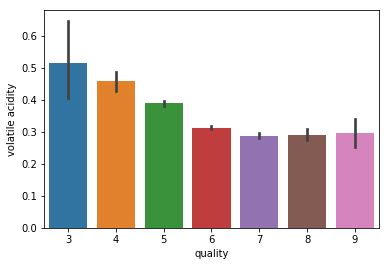

In [241]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

Barplot showing the relation between quality and volatile acidity.

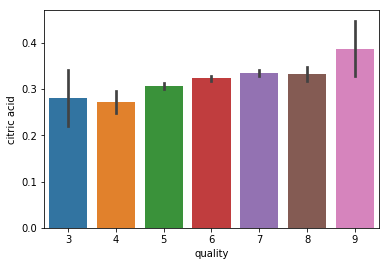

In [242]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

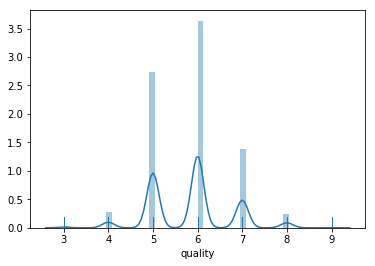

In [243]:
sns.distplot(df['quality'],kde=True,rug=True)

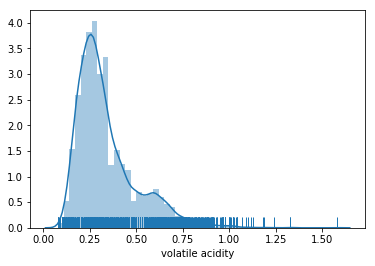

In [244]:
sns.distplot(df['volatile acidity'],kde=True,rug=True)

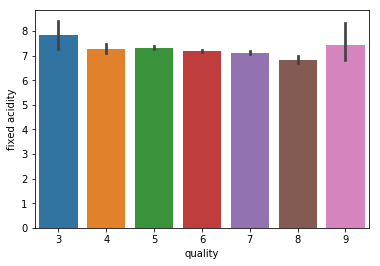

In [245]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

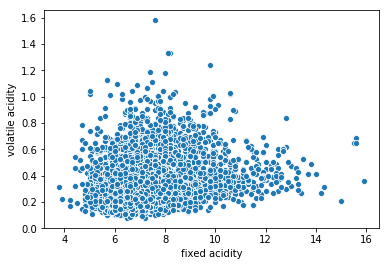

In [246]:
sns.scatterplot(x='fixed acidity',y='volatile acidity',data=df)

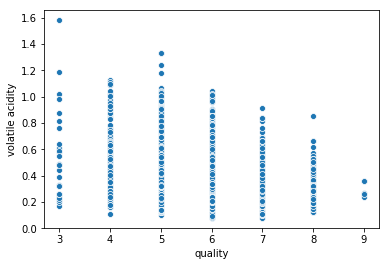

In [247]:
sns.scatterplot(x='quality',y='volatile acidity',data=df)

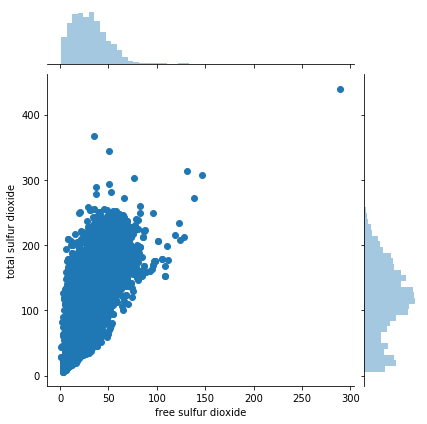

In [248]:
sns.jointplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df)

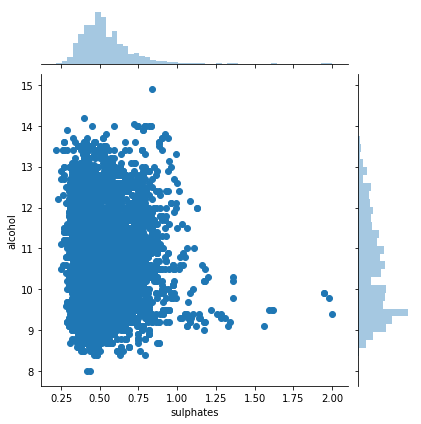

In [249]:
sns.jointplot(x='sulphates',y='alcohol',data=df)

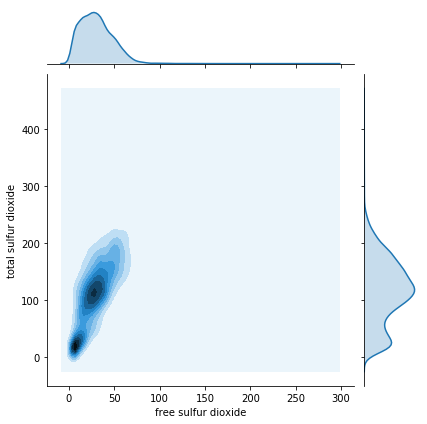

In [250]:
sns.jointplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df,kind='kde')

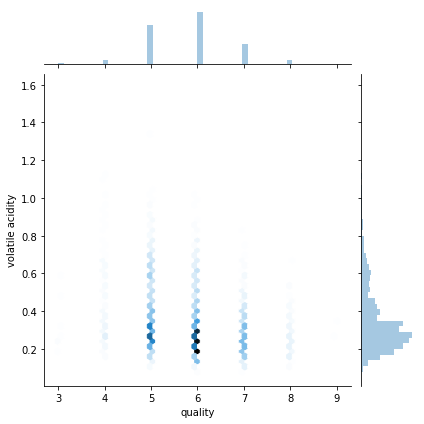

In [251]:
sns.jointplot(x = 'quality', y = 'volatile acidity', data = df,kind='hex')

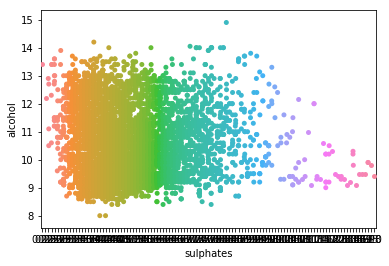

In [252]:
sns.stripplot(x='sulphates',y='alcohol',data=df)

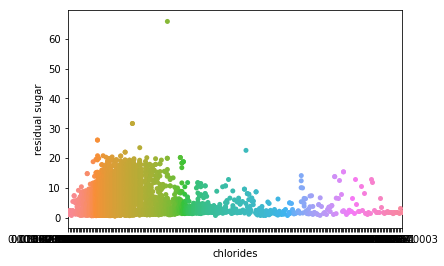

In [253]:
sns.stripplot(x='chlorides',y='residual sugar',data=df)

# Decision tree algorithm :-
## The general motive of using Decision Tree is to create a training model which can use to predict class or value of target variables by learning decision rules inferred from prior data(training data).

In [254]:
simpleTree = DecisionTreeClassifier(max_depth=5)

Using the decision tree algo to train the model.

In [255]:
simpleTree.fit(data_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fitting the decision tree algorithm on the dataset.

In [256]:
simpleTreePerformance = precision_recall_fscore_support(target_test,simpleTree.predict(data_test))

In [257]:
simpleTreePerformance

(array([0.88080073, 0.52238806]),
 array([0.90977444, 0.44491525]),
 array([0.89505317, 0.4805492 ]),
 array([1064,  236], dtype=int64))

In [258]:
print('Precision, Recall, Fscore, and Support for each class in simple tree classifiers:'+'\n')
for treeMethod in [simpleTreePerformance]:
    print('Precision: ',treeMethod[0])
    print('Recall: ',treeMethod[1])
    print('Fscore: ',treeMethod[2])
    print('Support: ',treeMethod[3],'\n')

Precision, Recall, Fscore, and Support for each class in simple tree classifiers:

Precision:  [0.88080073 0.52238806]
Recall:  [0.90977444 0.44491525]
Fscore:  [0.89505317 0.4805492 ]
Support:  [1064  236] 



In [259]:
print('Confusion Matrix for simple tree classifiers:')
print('Simple Tree:\n',confusion_matrix(target_test,simpleTree.predict(data_test)),'\n')

Confusion Matrix for simple tree classifiers:
Simple Tree:
 [[968  96]
 [131 105]] 



Confusion Matrix of the dataset using algo.

In [260]:
print('Feature Importances for simple tree\n')
for importance,feature in zip(simpleTree.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    print('{}: {}'.format(feature,importance))

Feature Importances for simple tree

fixed acidity: 0.037241528182057754
volatile acidity: 0.08758337209763072
citric acid: 0.027027005823800698
residual sugar: 0.06719727293396124
chlorides: 0.03908101116661483
free sulfur dioxide: 0.045389662671503954
total sulfur dioxide: 0.0
density: 0.03657494685379258
pH: 0.027828757548163732
sulphates: 0.05240818494051976
alcohol: 0.5796682577819547


In [261]:
print('Precision: ',simpleTreePerformance[0][0])

Precision:  0.8808007279344859


## Final precision of the model